# Import the packages and modules

In [1]:
from gym_vrp.envs import SantaIRPEnv, IRPEnv
from agents.ff_sdp_agent import SDPAgentFF

import torch


## Train the agent

In [2]:
batch_size = 32
seed = 123
num_nodes = 7

num_epochs = 1001
# num_epochs = 251
lr=1E-4
gamma = 0.99
dropout_rate = 0.5
hidden_dim=1024


# Instantiate the SantaIRPEnv environment
env_santa = SantaIRPEnv(num_nodes=num_nodes, batch_size=batch_size, seed=seed, num_draw=3)

# Instantiate the TSPAgentFF (assuming it's compatible with SantaIRPEnv)
agent_santa_ff = SDPAgentFF(node_dim=num_nodes,hidden_dim=hidden_dim,lr=lr,gamma=gamma,dropout_rate=dropout_rate,
    seed=seed, csv_path=f"./train_logs/loss_log_santa_ff_{num_nodes}_{seed}.csv",
)

# Train the agent
agent_santa_ff.train(
    env_santa,
    episodes=num_epochs,
    check_point_dir=f"./check_points/santa_ff_{num_nodes}_{seed}/",
)

INFO:root:Start Training
INFO:root:Saved new best model at episode 0 with loss: 8.172967910766602
INFO:root:Saved new best model at episode 6 with loss: 7.5053629875183105
INFO:root:Saved new best model at episode 9 with loss: 6.688494682312012
INFO:root:Saved new best model at episode 10 with loss: 6.552518367767334
INFO:root:Saved new best model at episode 14 with loss: 5.702597618103027
INFO:root:Saved new best model at episode 23 with loss: 5.653763294219971
INFO:root:Saved new best model at episode 24 with loss: 5.6158318519592285
INFO:root:Saved new best model at episode 29 with loss: 4.9107842445373535
INFO:root:Saved new best model at episode 42 with loss: 4.272141933441162
INFO:root:Saved new best model at episode 43 with loss: 3.9933924674987793
INFO:root:Episode 50 finished - Loss: 5.2484025955200195
INFO:root:Episode 100 finished - Loss: 4.738417148590088
INFO:root:Episode 150 finished - Loss: 5.065690040588379
INFO:root:Saved new best model at episode 156 with loss: 3.9127

Epoch 00907: reducing learning rate of group 0 to 1.0000e-05.


INFO:root:Saved new best model at episode 915 with loss: 3.48500919342041
INFO:root:Episode 950 finished - Loss: 5.893147945404053
INFO:root:Episode 1000 finished - Loss: 4.970690727233887


## Visualise the actions of the agent in the environments

In [3]:
# Setup for evaluation
env_santa.reset()
env_santa.enable_video_capturing(
    video_save_path=f"./videos/video_test_santa_ff_{num_nodes}_{seed}.mp4"
)

In [4]:
# load the best agent from training
agent_santa_ff.model.load_state_dict(torch.load(f"./check_points/santa_ff_{num_nodes}_{seed}/best_model.pt"))

<All keys matched successfully>

<Figure size 640x480 with 0 Axes>

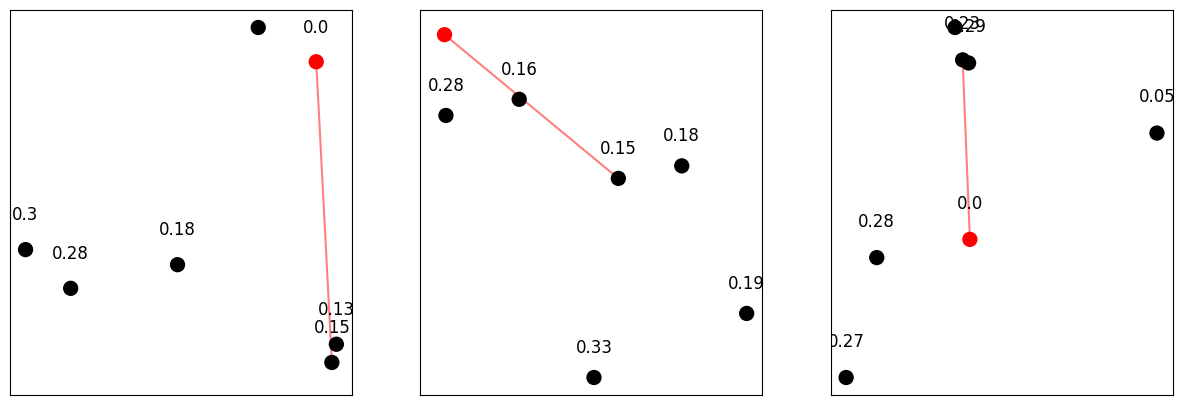

<Figure size 640x480 with 0 Axes>

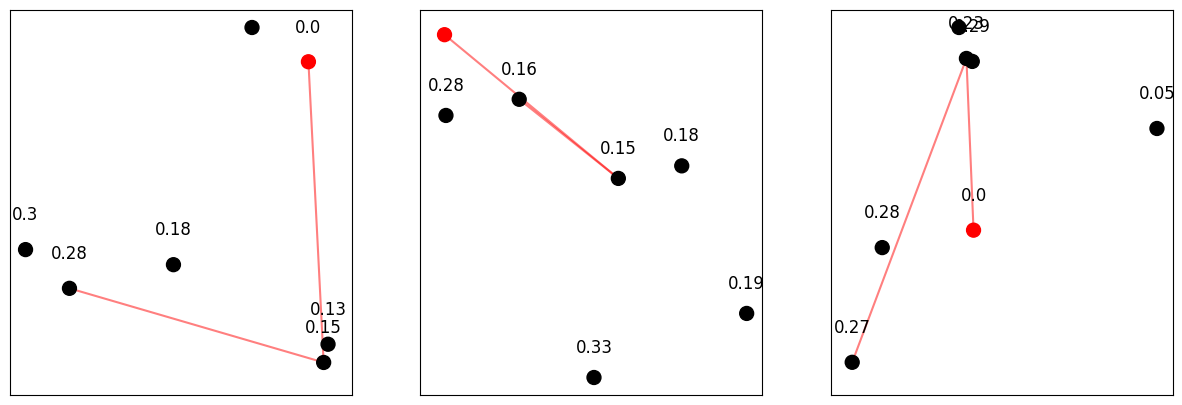

<Figure size 640x480 with 0 Axes>

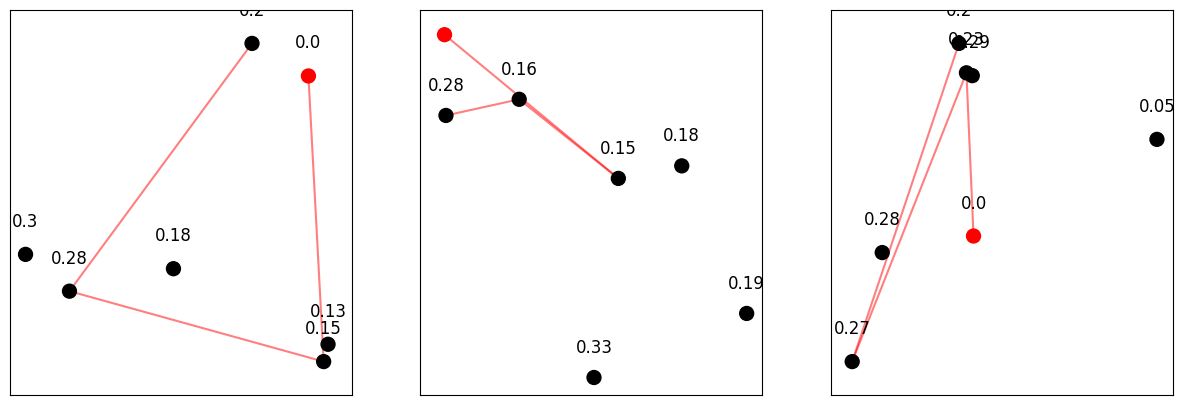

<Figure size 640x480 with 0 Axes>

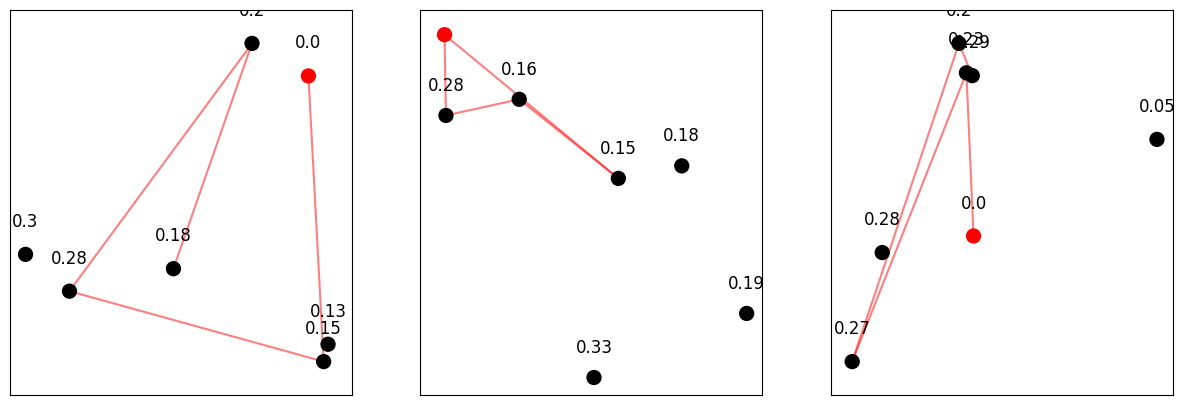

<Figure size 640x480 with 0 Axes>

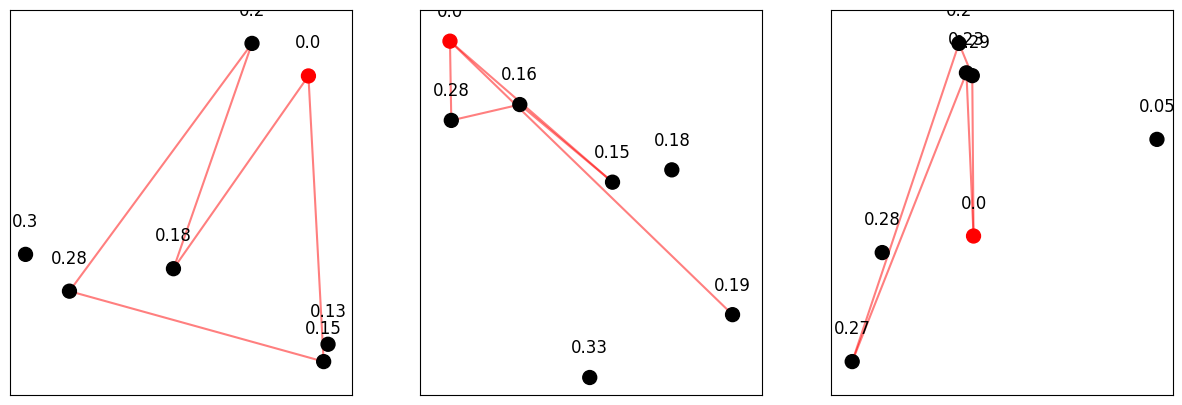

<Figure size 640x480 with 0 Axes>

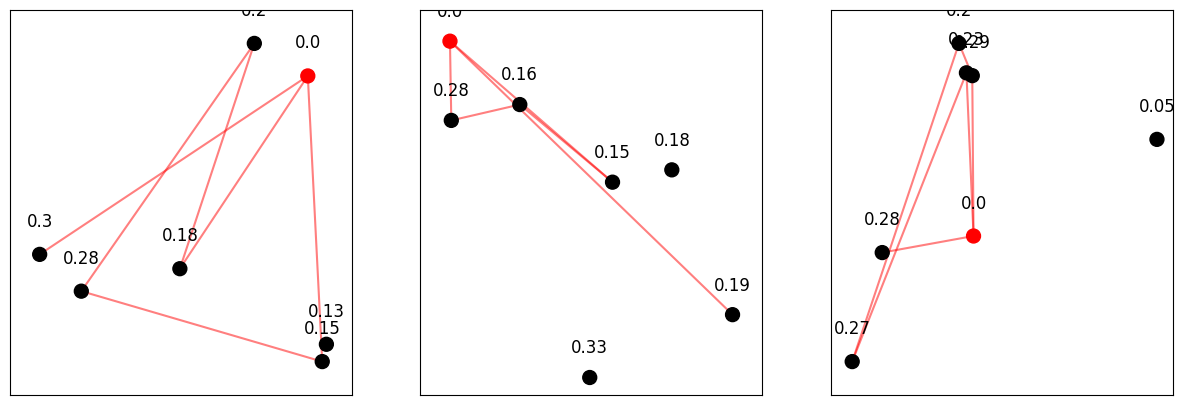

<Figure size 640x480 with 0 Axes>

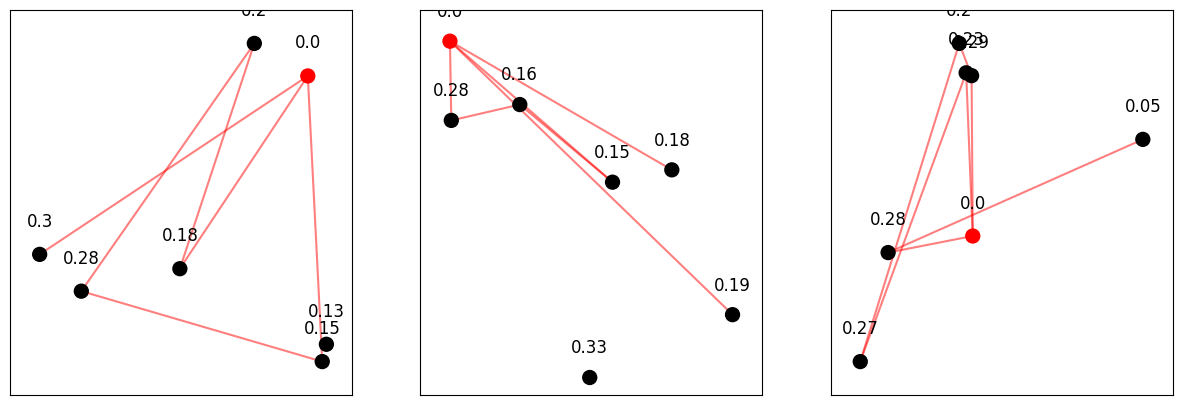

<Figure size 640x480 with 0 Axes>

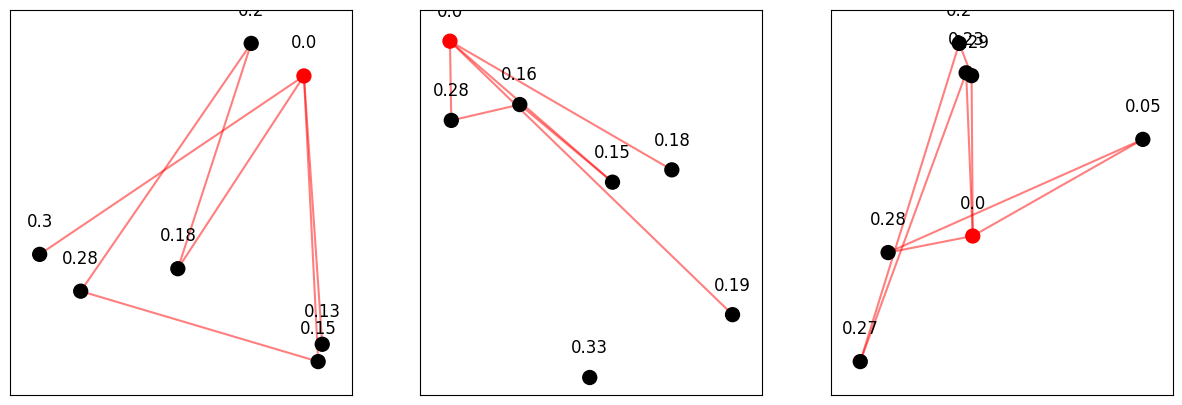

<Figure size 640x480 with 0 Axes>

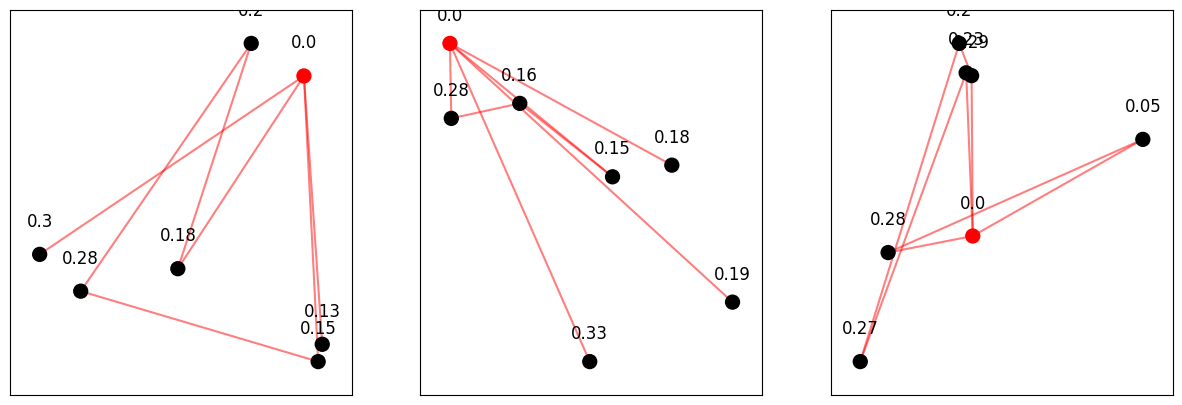

<Figure size 640x480 with 0 Axes>

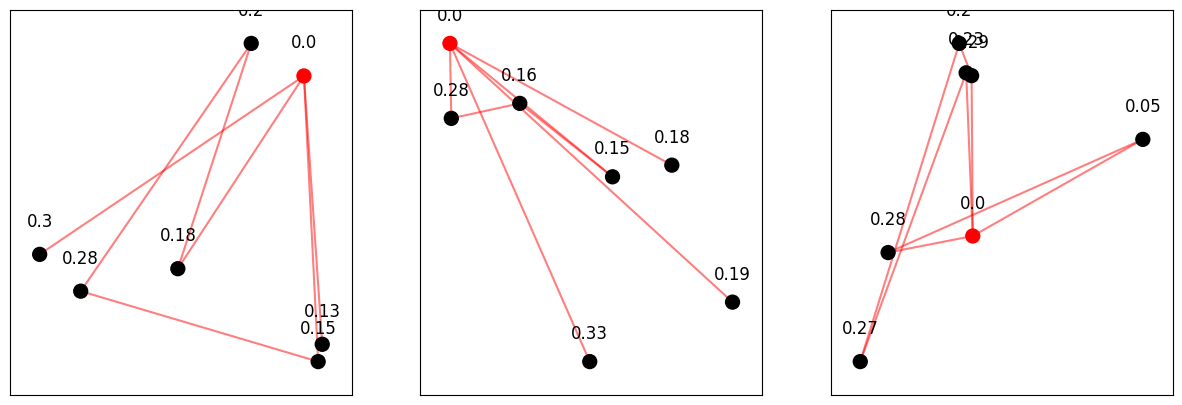

<Figure size 640x480 with 0 Axes>

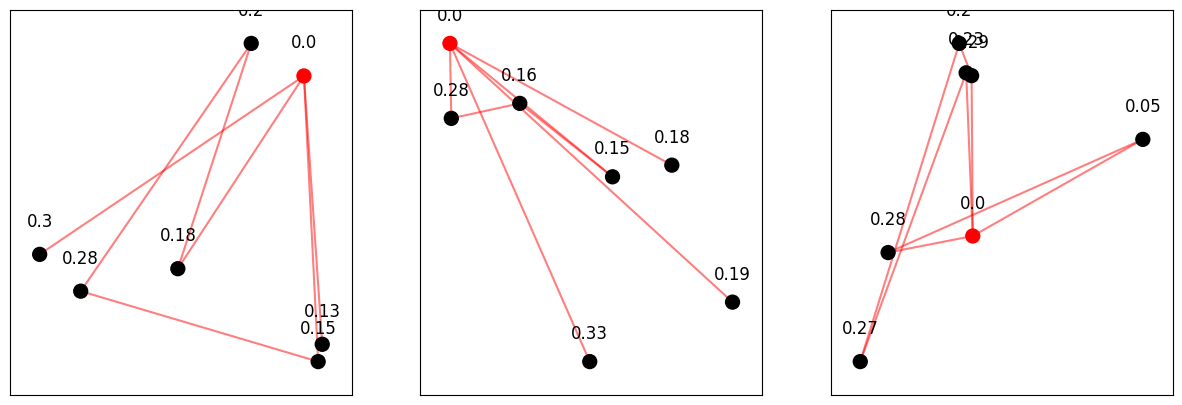

In [5]:
# Evaluate the agent
rewards = agent_santa_ff.evaluate(env_santa)

In [6]:
# Close the video recorder
env_santa.vid.close()

In closing function
Environment closing
Moviepy - Building video ./videos/video_test_santa_ff_7_123.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_7_123.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_7_123.mp4


## Learning Plots

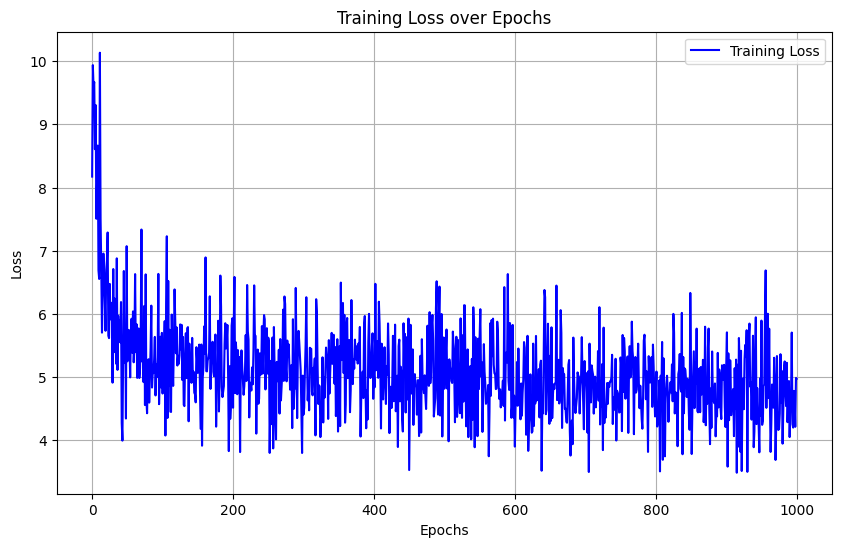

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = f"./train_logs/loss_log_santa_ff_{num_nodes}_{seed}.csv"
data = pd.read_csv(csv_path)

# Extract the 'Epoch' and 'Loss' columns
epochs = data['Epoch']
loss = data['Loss']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


# Performance

In [14]:
cumulative_rewards = rewards.cumsum(dim=0)
mean_final_reward = cumulative_rewards[-1].mean()
print("mean_final_reward",mean_final_reward)

mean_final_reward tensor(-5.4431)


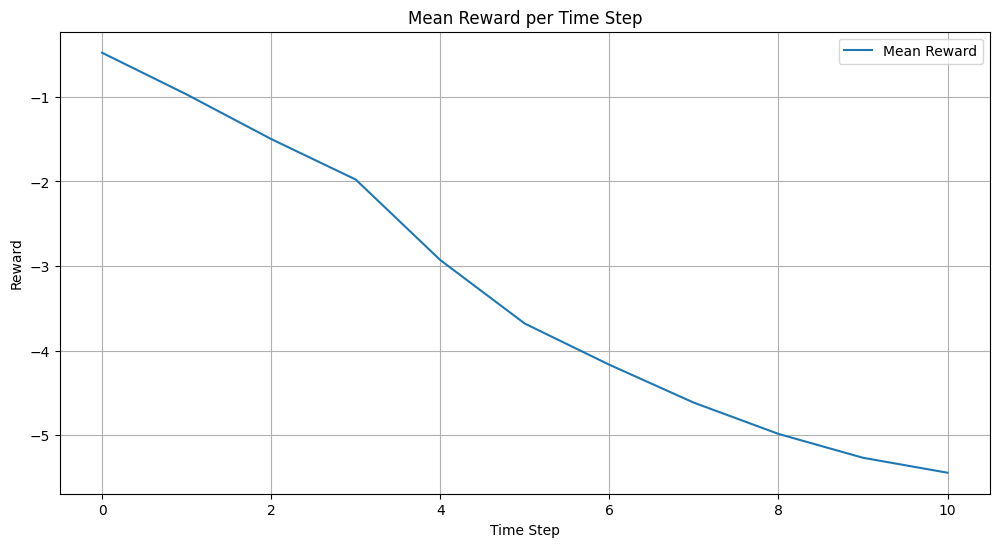

In [12]:
mean_rewards = rewards.cumsum(dim=0).mean(dim=1)  # Calculate mean across batches for each time step
plt.figure(figsize=(12, 6))
plt.plot(mean_rewards, label='Mean Reward')
plt.title('Mean Reward per Time Step')
plt.xlabel('Time Step')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)
plt.show()

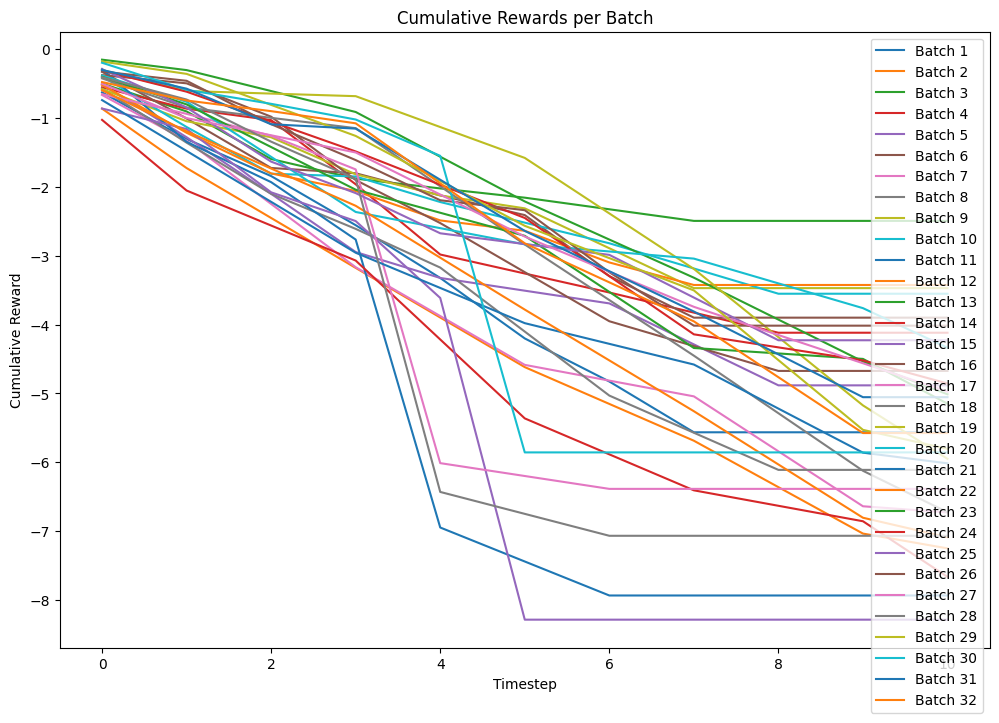

In [13]:
import torch
import matplotlib.pyplot as plt

# Assuming rewards_tensor is your batched rewards tensor
# Sample data (Replace this with your actual rewards_tensor)
rewards_tensor = torch.randn(10, 32)  # 10 timesteps, 32 batches

# Calculate the cumulative sum of rewards for each batch
cumulative_rewards = rewards.cumsum(dim=0)

# Plotting
plt.figure(figsize=(12, 8))
for i in range(cumulative_rewards.shape[1]):
    plt.plot(cumulative_rewards[:, i], label=f'Batch {i+1}')

plt.title('Cumulative Rewards per Batch')
plt.xlabel('Timestep')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()